In [3]:
import numpy as np 

So most of linear algabra apparently boils down to linear combinations. that is just scalar multiplication by vectors and then vector addition (or subtraction which is just adding the negation)

In [5]:
vec1 = np.array([1, 1])
vec2 = np.array([2, 3])

print(vec1, vec2)

[1 1] [2 3]


not so bad, there you have 2 2d vectors. typically in linear algebra the notation would be to have them vertical as col vectors. [1,1] is 3 things. it is that column, it is also the  point in space 1,1, and it is also an arrow, visual vector of unit magnitude starting at the origin of its coordinate system and going to point 1,1. technically that is a normalized vector because all the components, the values of the dimensions are 1. does that mean (0,0) and (1,1) line is 1 as well? euclidean distance woudl be sqrt of sum of squared differences between distance right, so guessing that is 1 - 0 squared + 1 - 0 squared, which is 1 + 1, that is 2, then sqrt of 2, so not at all 1.And it turns out I was wrong, good thing I'm studying! normalized vector has a magnitude of 1. I knew that, but I guess not solidly enough that I didn't have to work it out. so vector with (1,1) is not normalized.   

so now what? linear combinations, that's what. if I had an 'a' and a 'b', then I could scale the vectors by this. adding the vectors is first though, getting ahead of myself. let's try that in numpy

In [6]:
vec1 + vec2

array([3, 4])


l this isn't bad, just adding the components. now scaling? 

In [7]:
2*vec1

array([2, 2])

nice, so that is just multiplying 2 by each component. so far so easy. but the thing that linear algebra does that gives everyone a headache is leap from this to thinking about unknowns in the equations. so if it wasn't 2 that I was using, but I could instead pick any number, what are the implications? Turns out a lot. with vec1, I could scale it so that I could get it to be any point along the infinite line (in both directions) that is parallel with (1, 1). picking a few coefficients at random, say instead of 2 I picked -1000, or 50.25. 

In [8]:
print(1000 * vec1)

[1000 1000]


In [9]:
print(50.25 * vec1)

[50.25 50.25]


picking (1,1) makes it easier to see. the slope is the same for these because it is 1. teh origin will also be the same as 0,0 because that is where all single vectors are based from. so I can create any point on that line. I also can't create points off of that line, since the scaling happens to both vector components, so as much as I grow the purely 'horizontal' x part I'm going to also grow the purely 'vertical' y part ivery time. 

so then with these things in mind, Strang starts to give students a preview of how far they are going to go by going ferom this to linear combinations. that is what we showed before, where you have two or more vectors being added and each one is being scaled by some coefficient. Whereas in the thing we just talked about with one vector, you could only represent a line, with two vectors you can represent a plane. That is another leap of understanding, which I feel ilke can be articulated though in a way that isn't too confusing. 

we couldn't chagne the slope of the line vector when pickign different values for the coefficient, but if we have two vectors that don't have the same slope starting at the origin and we are scaling them both, we have all the values on two infinite lines. it turns out that all the values on two infinite lines, no matter what their slopes are, can represent every point on the plane those two lines are on. why? well, it takes a bit of visualization, but since the point that results from adding these vectors comes from drawing a parallelogram of some sort that results from putting them head to tail, if you imagine those lines getting longer and shorter but not at the same rate, it starts to feel intuitive that you could arbitrarily move that result point up, down, left or right anywhere on the x, y coordinate system. 

so we have this combination we can work with, with x*vec1 + y * vec2 where x and y are scalars. let's see what that could look like for this situation. picking some values for x and y. how about x=10 and y=3

In [10]:
10 * vec1 + 3 * vec2

array([16, 19])

so the result was [16,19]. that means for those two vectors, [1,1] and [2,3], if you had on the right hand side of your linear combination equation the value [16,19] and x and y as unknowns, then you'd have a single solution to the combination and it would be x=10 and y=3. Usually in linear algebra I think the point is to go in the other direction and find the values of the scalars, or it is to reason about all possible values for x and y that would solve the system, but this is another way to look at it.  

### puzzled by things I still don't know, maybe the best opporutnity to learn something

the book mentions for the system c*[1,1,1] + d*[2,3,4] = [1,0,0] that there is no solution, because [1,0,0] is not on that plane. once again this may assume that I'm well versed enough in visualizing that I can see this pretty apparently. Well, I still need to work my way through it. So [1,0,0] would be a vector going one on the x axis and then not being on either the y or z. if the left hand side described a solution that covered all of 3d space, then I'd expect this point to exist in that volume. So this implies that the left hand side is forming an infinite plane instead of an infinite 3d space. I might have trouble seeing that without plotting it, but let me try. first, I'll sample a bunch of values for each and see what it looks like: 

In [22]:
vec3 = np.array([1.,1.,1.])
vec4 = np.array([2.,3.,4.])

variable_pairs = [(2.0, 3.0), (1.0, 0.0), (3.0, 3.0), (-5.0, 40.0), (-5.0, -5.0)]


def log_possibilities(v1, v2, pair):
    print(f"linear combo {pair[0]} * {v1} + {pair[1]} * {v2} is {pair[0] * v1 + pair[1] * v2}")

[log_possibilities(vec3, vec4, pair) for pair in variable_pairs]

linear combo 2.0 * [1. 1. 1.] + 3.0 * [2. 3. 4.] is [ 8. 11. 14.]
linear combo 1.0 * [1. 1. 1.] + 0.0 * [2. 3. 4.] is [1. 1. 1.]
linear combo 3.0 * [1. 1. 1.] + 3.0 * [2. 3. 4.] is [ 9. 12. 15.]
linear combo -5.0 * [1. 1. 1.] + 40.0 * [2. 3. 4.] is [ 75. 115. 155.]
linear combo -5.0 * [1. 1. 1.] + -5.0 * [2. 3. 4.] is [-15. -20. -25.]


[None, None, None, None, None]

ok, I didn't see it, maybe gave up a little too early, or this isn't the way to think about it. I read a little ahead and learned about linear independence of vectors. these vectors are actually linearly independent, the test being that you can't find a scalar to turn one into the other. since on of them is [1,1,1], we know that any scalar is going to affect all components of it evenly, so it will never be able to get to [2,3,4] which would require the same ratio to exist between each of the dimensions, [4,6,8] for example.  

so these two 3d vectors aren't on the same line from the origin, doesn't taht mean that their linear combination can produce all 3d vectors? now I'm confused about the result vector [1,0,0] not being possible. I guess I can try to work it out though. the language of "the right hand side of the equation is not on the plane represented by the left hand side" is not intuitively clicking for me. 

In [31]:
# we have the two vectors
print(vec3)
print(vec4)

# and the result vector
vec5 = [1,0,0]

print(vec5)

# and if we had coefficients 'c' and 'd'. I can tell that there isn't really a value for c and d that could zero out both, except for maybe if c and d were both zero, but then how would we get the 1 in the first component of the result vector?
print(0*vec3 + 0*vec4)

# so I can tell the system can't be solved by elimination, but I don't have a geometric intuition for why this is correct. 
-1 * vec3 + .75 * vec4

[1. 1. 1.]
[2. 3. 4.]
[1, 0, 0]
[0. 0. 0.]


array([0.5 , 1.25, 2.  ])

I still haven't figured this out, I don't have the intuition required to see that in 3 dimensions what space of solutions is given by all values of c and d, and I can't use that to rule out [1,0,0] from that space. perhaps this is part of the reason this is so early in the book, to challenge the thought that linear algebra can be grasped simply through reasoning about lines and sample substitutions in one's head.

well this is me also not reading and comprehendin the prior section. so he already explained that the two vectors that I was looking at only fill a plane in 3d space, not the entire coordinate system. he gave two sets of vectors that could fill that plane. [1,1,1] [2,3,4] and [1,1,1],[3,4,5]. it is hard to see why these are on the same plan simply by looking at them. also I'm confused becasue I thought as you moved up through dimensions, the vector pairs in linear combinations would fill their entire space unless they were parallel. these are linearly independent vectors and yet they don't fill the space. I'm going to have to learn why this is the case. 

### AHA moment

this is somethint I'd like to internalize that was never the way I conceived of vectors before. if you go back and ask "what purpose does math have for vectors?" it is kind of to account for the idea that there are dimensions, and that numbers within separate dimensions cannot be combined with each other, they inhabit different spaces, where their value in that other space is zero and is orthoganol to the magnitude or nubmer that is expressed in the space they live in. 

I have to say, this never clicked for me and it is a much more interesting and fun and comprehendable way for me to think about this whole subject. 

### special linear combinations

book covers 4 types of 'special' combinations

1*v3 + 1*v4 sum of the vectors
1*v3 - 1*v4 difference of the vectors
0*v3 + 0*v4 zero vector
c*v3 + 0*v4 scalar multiple of one of the vectors, in this case vector v3 scaled by c

why are these special cases? I think intuitively they are special because the coefficients either are negating or they are not affecting one or both of the vectors. 

I wonder what the implications of being 'special' in this way are? 

In [33]:
# sum of vectors
print(1*vec3 + 1*vec4)

# differnce of vectors
print(1*vec3 - 1*vec4)
# zero vector
print(0*vec3 + 0*vec4)

# scalar multiplication of vector
print(3*vec3 + 0*vec4)

[3. 4. 5.]
[-1. -2. -3.]
[0. 0. 0.]
[3. 3. 3.]


one special property I learned form this is that the zero vector will always be a possible combination, it is in every vector space. that makes sense because for any set of variables, the variable represents all possible real numbers and then 0 will always be part of that and it has the magical scalar multiplication property of turning the vector into the zero vector. similarly

let me try and extrapolate from this to the other special cases

there will always be a way to make the coefficient 1 as well, so we can expect that for any two vectors in the combination we can always include the point that results from just adding them together, or for that matter subtracting them, or just having one of the vectors or the other. zero feels like the most important to remember in this case because that is a specific point in space that will always be there for a linear cobmination, you can't avoid having it in the result, whereas the other ones are dependent on the numbers in the vectors themselves. 

### visualizing vectors

for this I'll use matplotlib. maybe a little practice with that to start to get some muscle memory going. 

### using matplotlib

trying to find which part of matplot lib if that is really the best thing to use to just plot simple vectors in 2d and 3d. 


In [ ]:
import matplotlib.pyplot as plt
print("hi")

In [35]:
vec1

array([1, 1])

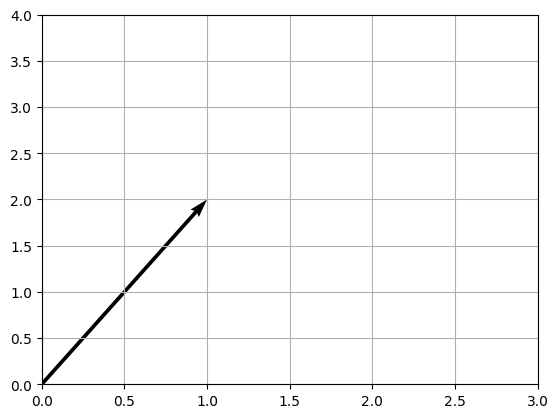

In [ ]:
plt.xlim(0, 3)
plt.ylim(0, 4)
plt.grid()
plt.show()

plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1)

x = 0
y = 0
u = vec1[0]
v = vec2[0]


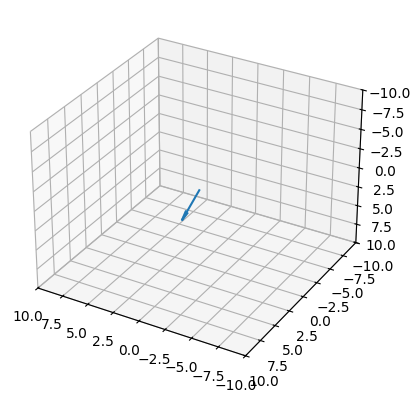

In [47]:
import mpl_toolkits.mplot3d.axes3d as p3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x,y,z = 0,0,0
u,v,w = 0,3,2

ax.quiver(x,y,z,u,v,w)


ax.set_xlim([10, -10])
ax.set_ylim([10, -10])
ax.set_zlim([10, -10])

plt.show()



